In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# Importing Data

In [5]:
P_a_before = pd.read_csv("./data/(before) Player actions features.csv")
P_a_after = pd.read_csv("./data/(after) Player actions features.csv")

In [40]:
N_m_before = pd.read_csv("./data/(before) Network measures features.csv")
N_m_after = pd.read_csv("./data/(after) Network measures features.csv")

In [42]:
G_a_before = pd.read_csv("./data/(before) Group activities features.csv")
G_a_after = pd.read_csv("./data/(after) Group activities features.csv")

In [43]:
P_i_before = pd.read_csv("./data/(before) Player information features.csv")
P_i_after = pd.read_csv("./data/(after) Player information features.csv")

In [44]:
S_i_before = pd.read_csv("./data/(before) Social interaction diversity features.csv")
S_i_after = pd.read_csv("./data/(after) Social interaction diversity features.csv")

In [36]:
P_a_after.head()

,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Type
0,1047,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,Human
1,1049,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,Human
2,1120,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,Human
3,1164,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,Human
4,1184,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,Human


# Creating Dataset for Modeling

In [145]:
final = pd.merge(P_a_after, P_i_after,  how='outer', on=["Actor", "Type"])
final = pd.merge(final, G_a_after, how='outer', on=["Actor", "Type"])
final = pd.merge(final, N_m_after, how='outer', on=["Actor", "Type"])
final = pd.merge(final, S_i_after, how='outer', on=["Actor", "Type"])

In [146]:
final['Type'] = final['Type'].apply(lambda x: 0 if x=="Human" else 1)

In [147]:
#Type to the front
final = final[['Type','Actor','A_Acc_x','collect_max_count','Sit_ratio','Sit_count','sit_count_per_day','Exp_get_ratio','Exp_get_count','exp_get_count_per_day','Item_get_ratio','Item_get_count','item_get_count_per_day','Money_get_ratio','Money_get_count','money_get_count_per_day','Abyss_get_ratio','Abyss_get_count','abyss_get_count_per_day','Exp_repair_count','Exp_repair_count_per_day','Use_portal_count','Use_portal_count_per_day','Killed_bypc_count','Killed_bypc_count_per_day','Killed_bynpc_count','Killed_bynpc_count_per_day','Teleport_count','Teleport_count_per_day','Reborn_count','Reborn_count_per_day','A_Acc_y','Login_day_count','Logout_day_count','Playtime','playtime_per_day','avg_money','Login_count','ip_count','Max_level','A_Acc_x','Avg_PartyTime','GuildAct_count','GuildJoin_count','A_Acc_y','p_in_deg','p_out_deg','p_Win_deg','p_Wout_deg','p_cc','f_in_deg','f_out_deg','f_Win_deg','f_Wout_deg','f_cc','t_in_deg','t_out_deg','t_Win_deg','t_Wout_deg','t_cc','m_in_deg','m_out_deg','m_Win_deg','m_Wout_deg','m_cc','s_in_deg','s_out_deg','s_Win_deg','s_Wout_deg','s_cc','w_in_deg', 'w_out_deg', 'w_Win_deg','w_Wout_deg','w_cc','p_deg','p_Wdeg','p_between2','p_closeness2','p_Eigenvector2','p_Eccentricity2','p_Authority2','p_Hub2','p_Pagerank2','f_deg','f_Wdeg','f_between2','f_closeness2','f_Eigenvector2','f_Eccentricity2','f_Authority2','f_Hub2','f_Pagerank2','t_deg','t_Wdeg','t_between2','t_closeness2','t_Eigenvector2','t_Eccentricity2','t_Authority2','t_Hub2','t_Pagerank2','c_deg','c_Wdeg','c_between2','c_closeness2','c_Eigenvector2','c_Eccentricity2','c_Authority2','c_Hub2','c_Pagerank2','m_deg','m_Wdeg','m_between2','m_closeness2','m_Eigenvector2','m_Eccentricity2','m_Authority2','m_Hub2','m_Pagerank2', 'A_Acc', 'Social_diversity']]

In [154]:
np.shape(final)

(49739, 126)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.decomposition import PCA

In [109]:
# spliting X and Y
X = final.iloc[:, 1:]
Y = final.iloc[:, 0]

In [113]:
# robust scaler for handling outliers
X_robust = RobustScaler().fit_transform(X)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_robust, Y, test_size=0.25)

In [117]:
xgb_model = xgb.XGBClassifier(n_estimators=2000,
                        n_jobs=4,
                        max_depth=15,
                        learning_rate=0.05,
                        gamma = 0.02,
                        subsample = 0.9,
                        colsample_bytree=0.9,
                        missing=-999,
                        tree_method='gpu_hist')

In [118]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.02,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=-999, n_estimators=2000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [160]:
prediction = xgb_model.predict(x_test)

              precision    recall  f1-score   support

       Human       0.96      0.99      0.98     10847
         Bot       0.94      0.73      0.83      1588

    accuracy                           0.96     12435
   macro avg       0.95      0.86      0.90     12435
weighted avg       0.96      0.96      0.96     12435



In [161]:
# Result with only robust scaling
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.96      0.99      0.98     10847
         Bot       0.94      0.73      0.83      1588

    accuracy                           0.96     12435
   macro avg       0.95      0.86      0.90     12435
weighted avg       0.96      0.96      0.96     12435



# Creating a New Model (Removing Some Features)

In [163]:
# Contribution of each feature
Feature_importance_temp = xgb_model.feature_importances_

new_feature = []

# Few point that not understood. Might have to divide with total play time
for i in range(125):
    print(final.columns[i+1], Feature_importance_temp[i])
    # According to the 20:80 law, remove lower 80% of the features
    if Feature_importance_temp[i] > np.percentile(Feature_importance_temp, 80):
        new_feature.append(final.columns[i+1])

Actor 0.008378201
A_Acc_x 0.0071749655
A_Acc_x 0.008394805
collect_max_count 0.007745657
Sit_ratio 0.009422003
Sit_count 0.008232912
sit_count_per_day 0.0087775905
Exp_get_ratio 0.0103864
Exp_get_count 0.008448585
exp_get_count_per_day 0.016041702
Item_get_ratio 0.008140621
Item_get_count 0.005910442
item_get_count_per_day 0.04131602
Money_get_ratio 0.006014478
Money_get_count 0.005173226
money_get_count_per_day 0.0053069512
Abyss_get_ratio 0.0075376816
Abyss_get_count 0.0056648385
abyss_get_count_per_day 0.0056410753
Exp_repair_count 0.0057600713
Exp_repair_count_per_day 0.0057835337
Use_portal_count 0.01113804
Use_portal_count_per_day 0.0071392218
Killed_bypc_count 0.0055660787
Killed_bypc_count_per_day 0.005552773
Killed_bynpc_count 0.0054165116
Killed_bynpc_count_per_day 0.005661857
Teleport_count 0.006073039
Teleport_count_per_day 0.006187992
Reborn_count 0.0072900103
Reborn_count_per_day 0.006851983
A_Acc_y 0.006499871
A_Acc_y 0.0004961585
Login_day_count 0.009953872
Logout_day_c

In [ ]:
# even he feature of the upper 20% has low contribution rate
np.percentile(Feature_importance_temp, 80)

In [184]:
# New X with new feature list
X_selected_ft = X[new_feature]
np.shape(new_feature)

(25,)

In [177]:
# robust scaler on new X
X_selected_robust = RobustScaler().fit_transform(X_selected_ft)

In [178]:
# spliting 
x_train, x_test, y_train, y_test = train_test_split(X_selected_robust, Y, test_size=0.25)

In [179]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.02,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=-999, n_estimators=2000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [180]:
prediction = xgb_model.predict(x_test)

### Less Variables (20%, 25) and better performance

In [ ]:
# Result with feature selection and robust scaling
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Human', 'Bot']))

# New Model (Selceted Features + PCA + Standard Scaler)

In [215]:
X_selected_SS = StandardScaler().fit_transform(X_selected_ft)

In [230]:
# remove variables up to  the deviation rate of 99%
pca = PCA(n_components=0.90)
X_selected_RB_SS_PCA = pca.fit_transform(X_selected_SS)

In [231]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.21760085, 0.40563329, 0.51696529, 0.58388868, 0.63704526,
       0.68603797, 0.72408481, 0.75899234, 0.78724069, 0.81468242,
       0.84083517, 0.86457126, 0.88737458, 0.90690445])

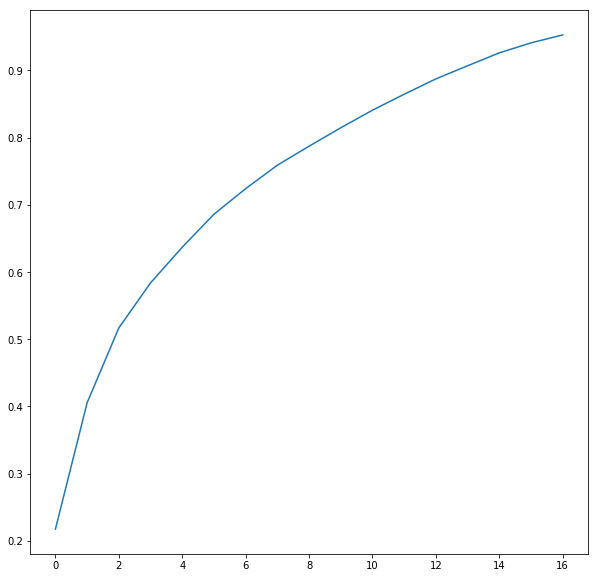

In [225]:
plt.figure(figsize=((10,10)))
plt.plot(cumsum)

In [232]:
# spliting 
x_train, x_test, y_train, y_test = train_test_split(X_selected_RB_SS_PCA, Y, test_size=0.25)

In [233]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.02,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=-999, n_estimators=2000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [234]:
prediction = xgb_model.predict(x_test)

### Less Variables (17) and Similar Performance (Pca 0.95)

In [229]:
# Result with feature selection, standard scaling and PCA
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.96      0.99      0.98     10848
         Bot       0.91      0.73      0.81      1587

    accuracy                           0.96     12435
   macro avg       0.93      0.86      0.89     12435
weighted avg       0.95      0.96      0.95     12435



### Less Variables (14) and Similar Performance (Pca 0.90)

In [235]:
# Result with feature selection, standard scaling and PCA
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.96      0.99      0.97     10890
         Bot       0.89      0.71      0.79      1545

    accuracy                           0.95     12435
   macro avg       0.92      0.85      0.88     12435
weighted avg       0.95      0.95      0.95     12435

